In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_points(batch_size, n_steps, resolution):
    points = []
    starting = np.random.rand(batch_size, 1)
    for i in range(n_steps):
        points.append(starting + (i * resolution))
    return np.asarray(points).reshape(-1, n_steps, 1)

In [3]:
n_steps = 200
n_neurons = 100
resolution = 0.1
n_outputs = 1
n_inputs = 1

In [4]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_outputs])

In [5]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu),
    output_size=n_outputs)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [6]:
learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [8]:
init = tf.global_variables_initializer()

In [9]:
saver = tf.train.Saver()

In [10]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        X_batch = get_points(batch_size, n_steps, resolution)
        y_batch = np.sin(X_batch)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if i % 500 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(mse)
    saver.save(sess, "./sin-one-input-x-axis-model")

0.56537277
0.1943774
0.04678466


INFO:tensorflow:Restoring parameters from ./sin-one-input-x-axis-model


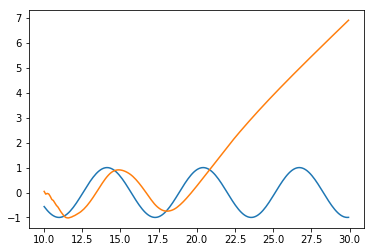

In [14]:
with tf.Session() as sess:
    saver.restore(sess, "./sin-one-input-x-axis-model")
    #get 100 more points that steps because we will try to predict the next 100 y values
    points = get_points(1, n_steps +100, resolution)[:, -n_steps:]
    actual = np.sin(points)   
    y_pred = sess.run(outputs, feed_dict={X: points.reshape(1, n_steps, -1)})
    plt.plot(points.reshape(-1), actual.reshape(-1))
    plt.plot(points[0][:n_steps].reshape(-1), y_pred.reshape(-1))